# py-iku: Visualization Options

This notebook demonstrates the various visualization formats available in py-iku for rendering Dataiku DSS flows.

## Available Formats

- **ASCII**: Terminal-friendly text diagrams
- **SVG**: Scalable vector graphics with Dataiku styling
- **HTML**: Interactive canvas with pan/zoom
- **Mermaid**: Markdown-compatible diagrams
- **PlantUML**: UML diagram format

In [1]:
from py2dataiku import convert
from IPython.display import HTML, SVG, display, Markdown

In [2]:
# Create a sample flow to visualize
sample_code = '''
import pandas as pd
import numpy as np

# Load data from multiple sources
orders = pd.read_csv('orders.csv')
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')

# Clean orders data
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['amount'] = orders['amount'].fillna(0)
orders = orders.dropna(subset=['order_id'])

# Join orders with customers
orders_enriched = pd.merge(orders, customers, on='customer_id', how='left')

# Join with products
orders_full = pd.merge(orders_enriched, products, on='product_id', how='left')

# Calculate metrics
orders_full['margin'] = orders_full['amount'] - orders_full['cost']
orders_full['margin_pct'] = np.round(orders_full['margin'] / orders_full['amount'] * 100, 2)

# Filter high-value orders
high_value = orders_full[orders_full['amount'] >= 100]

# Aggregate by customer
customer_summary = high_value.groupby('customer_id').agg({
    'amount': ['sum', 'mean', 'count'],
    'margin': 'sum',
    'order_date': 'max'
}).reset_index()

# Sort by total amount
customer_summary = customer_summary.sort_values(('amount', 'sum'), ascending=False)

# Save outputs
orders_full.to_csv('orders_enriched.csv', index=False)
customer_summary.to_csv('customer_summary.csv', index=False)
'''

flow = convert(sample_code)
print(f"Created flow with {len(flow.datasets)} datasets and {len(flow.recipes)} recipes")

Created flow with 11 datasets and 7 recipes


## 1. ASCII Visualization

Perfect for terminal output and text-based documentation.

In [3]:
ascii_output = flow.visualize(format='ascii')
print(ascii_output)

════════════════════════════════════════════════════════════════════════════════
                          DATAIKU FLOW: converted_flow  
════════════════════════════════════════════════════════════════════════════════

                              ┌──────────────────┐
                              │ 📊 orders         │
                             │    [INPUT]        │
                              └──────────────────┘

                              ┌──────────────────┐
                              │ 📊                │
                             │    [INPUT]        │
                              └──────────────────┘

                              ┌──────────────────┐
                              │ 📊 customers      │
                             │    [INPUT]        │
                              └──────────────────┘

                              ┌──────────────────┐
                              │ 📊 products       │
                             │    [INPUT]        │
            

## 2. Mermaid Diagrams

Mermaid diagrams can be embedded in Markdown documentation and rendered by GitHub, GitLab, and many other platforms.

In [4]:
mermaid_output = flow.visualize(format='mermaid')
print(mermaid_output)

flowchart TD
    subgraph inputs[Input Datasets]
        D0[(orders)]
        D2[(customers)]
        D3[(products)]
        D9[()]
    end
    subgraph outputs[Output Datasets]
        D6[(orders_full)]
    end
    D1[(orders_prepared)]
    D4[(orders_prepared_prepared)]
    D5[(orders_enriched)]
    D7[(high_value)]
    D8[(_chain_step_0)]
    D10[(None_sorted)]
    R0{Prepare\n(1 steps)}
    R1{Prepare\n(1 steps)}
    R2{Join\n(LEFT)}
    R3{Join\n(LEFT)}
    R4{Split}
    R5{Grouping\n(0 aggs)}
    R6{Sort}
    D0 --> R0
    R0 --> D1
    D1 --> R1
    R1 --> D4
    D1 --> R2
    D2 --> R2
    R2 --> D5
    D5 --> R3
    D3 --> R3
    R3 --> D6
    D6 --> R4
    R4 --> D7
    D7 --> R5
    R5 --> D8
    D9 --> R6
    R6 --> D10

    style D0 fill:#e1f5fe
    style D2 fill:#e1f5fe
    style D3 fill:#e1f5fe
    style D9 fill:#e1f5fe
    style D6 fill:#c8e6c9
    style R0 fill:#fff3e0
    style R1 fill:#fff3e0
    style R2 fill:#e3f2fd
    style R3 fill:#e3f2fd
    style R4 fill:#fce4

In [5]:
# Display in notebook using mermaid.js
mermaid_html = f'''
<script src="https://cdn.jsdelivr.net/npm/mermaid/dist/mermaid.min.js"></script>
<script>mermaid.initialize({{startOnLoad:true}});</script>
<div class="mermaid">
{mermaid_output}
</div>
'''
HTML(mermaid_html)

## 3. SVG Visualization

High-quality vector graphics with Dataiku-style colors and icons.

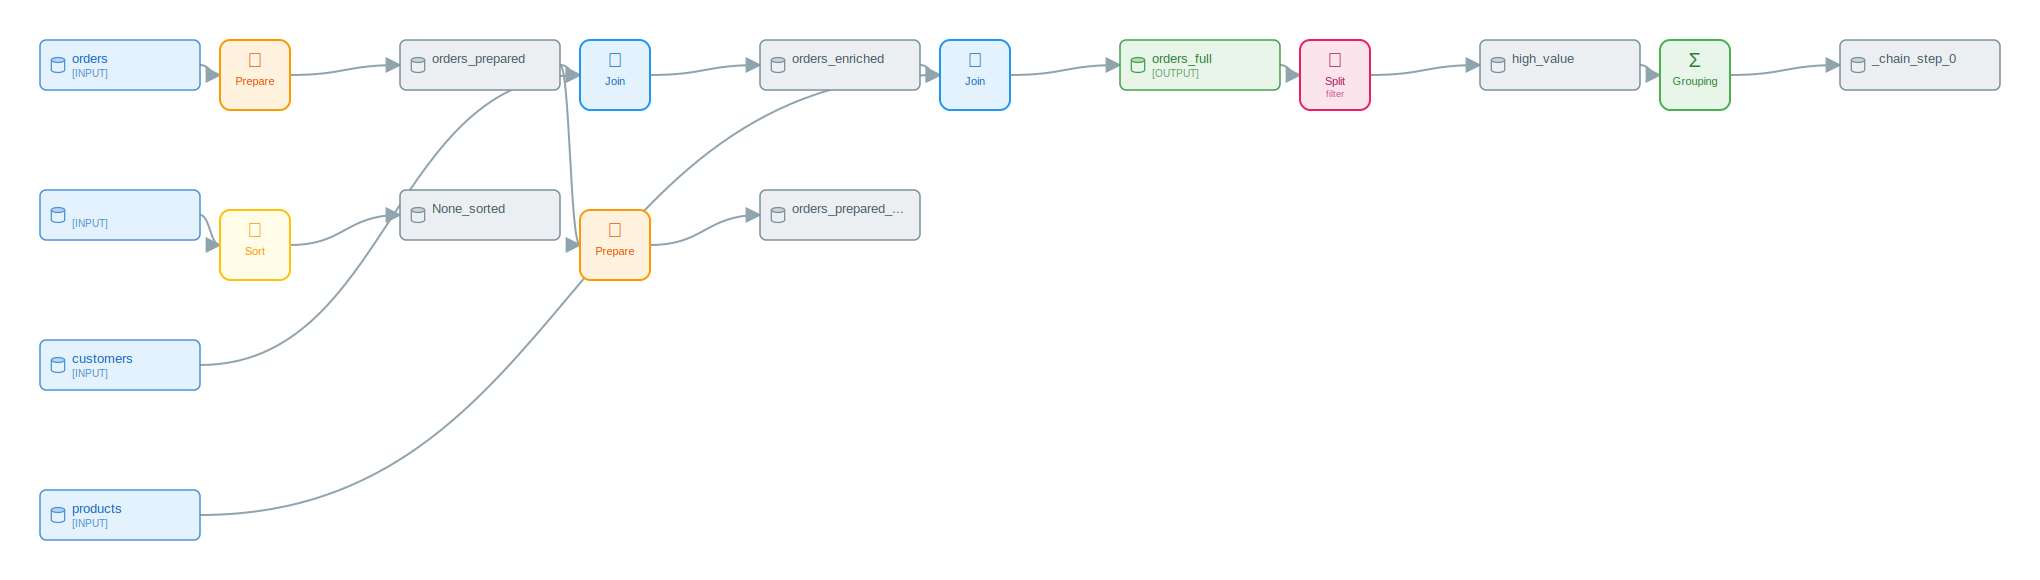

In [6]:
svg_output = flow.visualize(format='svg')
SVG(svg_output)

In [7]:
# Save SVG to file
with open('flow_diagram.svg', 'w') as f:
    f.write(svg_output)
print("SVG saved to flow_diagram.svg")

SVG saved to flow_diagram.svg


## 4. Interactive HTML

The HTML visualization includes:
- Pan and zoom controls
- Search functionality
- Click-to-view details panel
- Export buttons

In [8]:
html_output = flow.visualize(format='html')
HTML(html_output)

In [9]:
# Save HTML to file
with open('flow_interactive.html', 'w') as f:
    f.write(html_output)
print("Interactive HTML saved to flow_interactive.html")

Interactive HTML saved to flow_interactive.html


## 5. PlantUML Diagrams

PlantUML format for UML tools and documentation systems.

In [10]:
plantuml_output = flow.visualize(format='plantuml')
print(plantuml_output)

@startuml
!theme plain
skinparam backgroundColor #FAFAFA
skinparam defaultFontName Arial
skinparam defaultFontSize 12

' Dataset styles
skinparam rectangle {
  BackgroundColor<<input>> #E3F2FD
  BorderColor<<input>> #4A90D9
  FontColor<<input>> #1565C0
  BackgroundColor<<output>> #E8F5E9
  BorderColor<<output>> #43A047
  FontColor<<output>> #2E7D32
  BackgroundColor<<intermediate>> #ECEFF1
  BorderColor<<intermediate>> #78909C
  FontColor<<intermediate>> #455A64
}

' Recipe styles
skinparam card {
  BackgroundColor<<prepare>> #FFF3E0
  BorderColor<<prepare>> #FF9800
  BackgroundColor<<join>> #E3F2FD
  BorderColor<<join>> #2196F3
  BackgroundColor<<grouping>> #E8F5E9
  BorderColor<<grouping>> #4CAF50
  BackgroundColor<<split>> #FCE4EC
  BorderColor<<split>> #E91E63
  BackgroundColor<<python>> #E8EAF6
  BorderColor<<python>> #3F51B5
}

' Arrow style
skinparam arrow {
  Color #90A4AE
  Thickness 2
}

' Datasets
rectangle "orders" <<input>> as orders
rectangle "" <<input>> as 
rectangle "c

## 6. Themes

py-iku supports light and dark themes for SVG and HTML output.

In [11]:
from py2dataiku.visualizers.themes import DATAIKU_LIGHT, DATAIKU_DARK

# Show available theme colors
print("Light Theme Colors:")
for key, value in list(DATAIKU_LIGHT.items())[:10]:
    print(f"  {key}: {value}")

print("\nDark Theme Colors:")
for key, value in list(DATAIKU_DARK.items())[:10]:
    print(f"  {key}: {value}")

Light Theme Colors:


AttributeError: 'DataikuTheme' object has no attribute 'items'

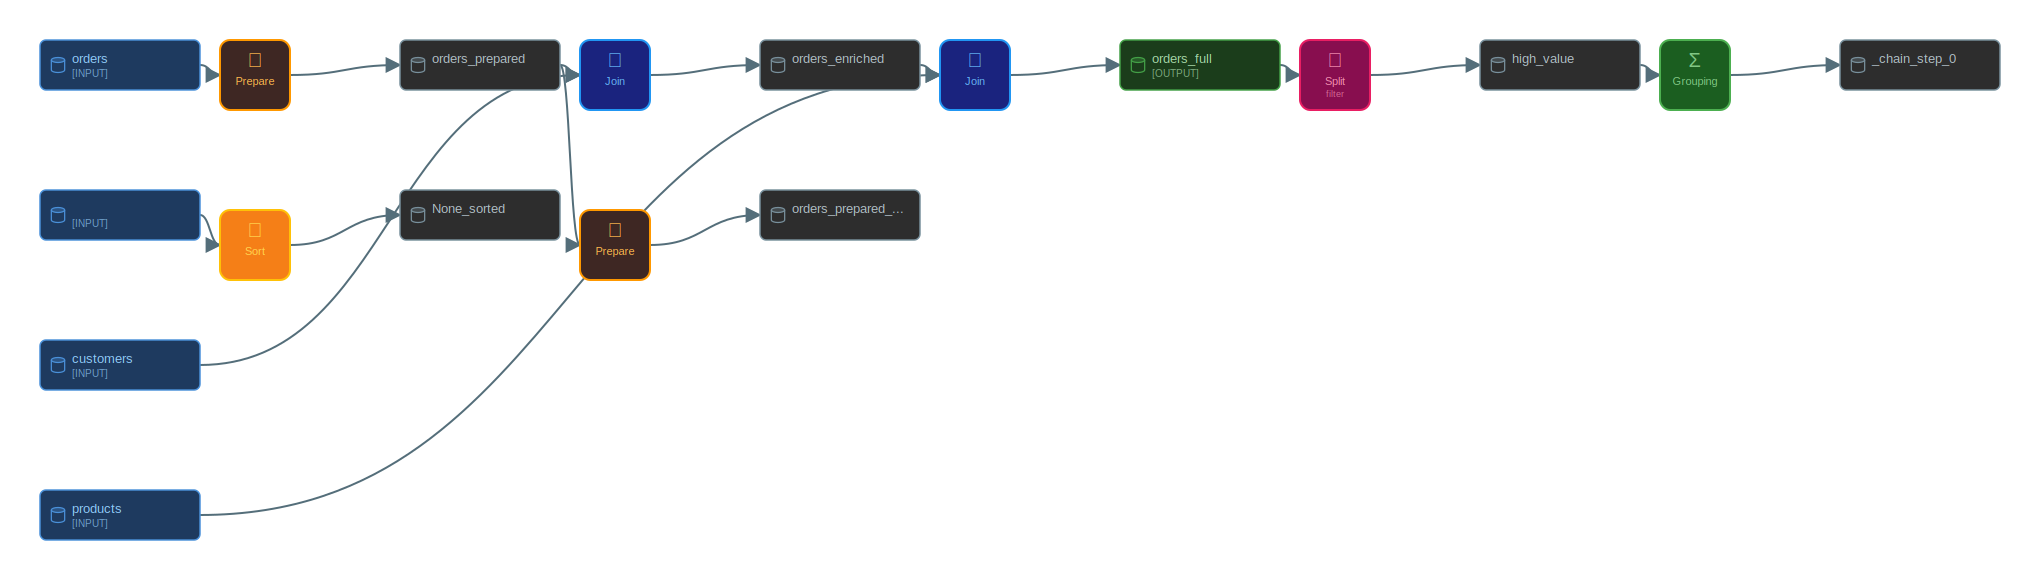

In [12]:
# Using the SVGVisualizer directly with custom theme
from py2dataiku.visualizers.svg_visualizer import SVGVisualizer

visualizer = SVGVisualizer(theme=DATAIKU_DARK)
dark_svg = visualizer.render(flow)
SVG(dark_svg)

## 7. Recipe Type Icons

Each recipe type has its own icon and color.

In [13]:
from py2dataiku.visualizers.icons import get_recipe_icon, get_recipe_label
from py2dataiku.models.dataiku_recipe import RecipeType

print("Recipe Icons and Labels:")
for recipe_type in RecipeType:
    icon = get_recipe_icon(recipe_type)
    label = get_recipe_label(recipe_type)
    print(f"  {recipe_type.value:20} {icon}  {label}")

ImportError: cannot import name 'get_recipe_icon' from 'py2dataiku.visualizers.icons' (/Users/matthewdeane/Documents/Data Science/python/_projects/py-iku/py2dataiku/visualizers/icons.py)

## 8. Layout Engine

The layout engine arranges nodes in a DAG (directed acyclic graph) layout.

In [14]:
from py2dataiku.visualizers.layout_engine import LayoutEngine

# Get the layout for our flow
engine = LayoutEngine()
layout = engine.compute_layout(flow)

print(f"Canvas size: {layout['canvas_width']} x {layout['canvas_height']}")
print(f"\nNode positions:")
for node_id, pos in list(layout['nodes'].items())[:5]:
    print(f"  {node_id}: ({pos['x']}, {pos['y']})")

AttributeError: 'LayoutEngine' object has no attribute 'compute_layout'

## 9. Visualizing Different Flow Patterns

Let's see how different pipeline patterns are visualized.

In [15]:
# Linear pipeline
linear_code = '''
import pandas as pd
df = pd.read_csv('input.csv')
df = df.dropna()
df = df.drop_duplicates()
df = df.sort_values('date')
df.to_csv('output.csv', index=False)
'''
linear_flow = convert(linear_code)
print("Linear Pipeline:")
print(linear_flow.visualize(format='ascii'))

Linear Pipeline:
════════════════════════════════════════════════════════════════════════════════
                          DATAIKU FLOW: converted_flow  
════════════════════════════════════════════════════════════════════════════════

                              ┌──────────────────┐
                              │ 📊 df             │
                             │    [INPUT]        │
                              └──────────────────┘

                                       │
                                       ▼

                                ┌──────────────┐
                               │   ⚙ PREPARE   │
                                │ ──────────── │
                                └──────────────┘

                                       │
                                       ▼

                              ┌──────────────────┐
                              │ 📊 df_prepared    │
                              └──────────────────┘

                                       │


In [16]:
# Fan-in pattern (multiple inputs)
fanin_code = '''
import pandas as pd
df1 = pd.read_csv('source1.csv')
df2 = pd.read_csv('source2.csv')
df3 = pd.read_csv('source3.csv')
combined = pd.concat([df1, df2, df3], ignore_index=True)
combined.to_csv('combined.csv', index=False)
'''
fanin_flow = convert(fanin_code)
print("Fan-in Pattern (Stack):")
print(fanin_flow.visualize(format='ascii'))

Fan-in Pattern (Stack):
════════════════════════════════════════════════════════════════════════════════
                          DATAIKU FLOW: converted_flow  
════════════════════════════════════════════════════════════════════════════════

                              ┌──────────────────┐
                              │ 📊 df1            │
                             │    [INPUT]        │
                              └──────────────────┘

                              ┌──────────────────┐
                              │ 📊 df2            │
                             │    [INPUT]        │
                              └──────────────────┘

                              ┌──────────────────┐
                              │ 📊 df3            │
                             │    [INPUT]        │
                              └──────────────────┘

                                       │
                                       ▼

                                ┌──────────────┐
         

In [17]:
# Fan-out pattern (multiple outputs)
fanout_code = '''
import pandas as pd
df = pd.read_csv('input.csv')
high = df[df['value'] >= 100]
medium = df[(df['value'] >= 50) & (df['value'] < 100)]
low = df[df['value'] < 50]
high.to_csv('high_value.csv', index=False)
medium.to_csv('medium_value.csv', index=False)
low.to_csv('low_value.csv', index=False)
'''
fanout_flow = convert(fanout_code)
print("Fan-out Pattern (Split):")
print(fanout_flow.visualize(format='ascii'))

Fan-out Pattern (Split):
════════════════════════════════════════════════════════════════════════════════
                          DATAIKU FLOW: converted_flow  
════════════════════════════════════════════════════════════════════════════════

                              ┌──────────────────┐
                              │ 📊 df             │
                             │    [INPUT]        │
                              └──────────────────┘

                                       │
                                       ▼

                                ┌──────────────┐
                               │   ⑂ SPLIT     │
                                │ ──────────── │
                                │ filter       │
                                └──────────────┘

                                ┌──────────────┐
                               │   ⑂ SPLIT     │
                                │ ──────────── │
                                │ filter       │
                         

## 10. Format Comparison

Quick comparison of all formats for a simple flow.

In [18]:
simple_code = '''
import pandas as pd
df = pd.read_csv('data.csv')
df['clean_name'] = df['name'].str.strip().str.title()
summary = df.groupby('category')['amount'].sum().reset_index()
summary.to_csv('summary.csv', index=False)
'''
simple_flow = convert(simple_code)

formats = ['ascii', 'mermaid', 'plantuml']
for fmt in formats:
    print(f"\n{'='*60}")
    print(f"Format: {fmt.upper()}")
    print('='*60)
    print(simple_flow.visualize(format=fmt))


Format: ASCII
════════════════════════════════════════════════════════════════════════════════
                          DATAIKU FLOW: converted_flow  
════════════════════════════════════════════════════════════════════════════════

                              ┌──────────────────┐
                              │ 📊                │
                             │    [INPUT]        │
                              └──────────────────┘

                              ┌──────────────────┐
                              │ 📊 df             │
                             │    [INPUT]        │
                              └──────────────────┘

                                       │
                                       ▼

                                ┌──────────────┐
                               │   Σ GROUPING  │
                                │ ──────────── │
                                └──────────────┘

                                       │
                                  

## Next Steps

- See `05_advanced_features.ipynb` for plugins, CLI, and DSS export